In [1]:
import sklearn
from sklearn.model_selection import train_test_split#训练集测试集划分
from sklearn.linear_model import LinearRegression#导入线性回归模型
from sklearn.preprocessing import StandardScaler,MinMaxScaler#数据标准化/归一化
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
import time

In [2]:
#设置字符集，防止中文乱码在画图中出现
# mpl.rcParams['font.sans-serif']=[u'simHei']
# mpl.RcParams['axes.unicode_minus']=False

In [3]:
#加载数据
#日期、时间、有功功率、无功功率、电压
path1='datas/household_power_consumption_1000.txt'
df=pd.read_csv(path1,sep=';',low_memory=False)#没有混合类型的时候，可以通过low_memory=False调用更多内存，加快效率

In [10]:
df.head()
df.tail()#显示后五行数据

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
995,17/12/2006,09:59:00,2.296,0.054,238.13,9.6,0.0,0.0,0.0
996,17/12/2006,10:00:00,2.292,0.054,238.03,9.6,0.0,0.0,0.0
997,17/12/2006,10:01:00,0.370,0.000,240.26,2.4,0.0,0.0,0.0
998,17/12/2006,10:02:00,0.472,0.000,240.15,2.4,0.0,0.0,0.0
999,17/12/2006,10:03:00,3.054,0.060,237.55,13.4,0.0,0.0,18.0


In [5]:
# 异常数据处理（异常数据过滤）
new_df=df.replace('?',np.nan)#将非法字符替换为np.nan
datas=new_df.dropna(axis=0,how='any')#只要又一个数据为空，就进行行删除
datas.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.418772,0.089232,240.03579,10.351000,0.0,2.749000,5.756000
std,1.239979,0.088088,4.08442,5.122214,0.0,8.104053,8.066941
min,0.206000,0.000000,230.98000,0.800000,0.0,0.000000,0.000000
25%,1.806000,0.000000,236.94000,8.400000,0.0,0.000000,0.000000
50%,2.414000,0.072000,240.65000,10.000000,0.0,0.000000,0.000000
75%,3.308000,0.126000,243.29500,14.000000,0.0,1.000000,17.000000
max,7.706000,0.528000,249.37000,33.200000,0.0,38.000000,19.000000


In [6]:
# 创建时间函数格式化字符串
def date_format(dt):
    t=time.strptime(' '.join(dt),'%d/%m/%Y %H:%M:%S')
    return (t.tm_year,t.tm_mon,t.tm_mday,t.tm_hour,t.tm_min,t.tm_sec)

In [7]:
#得倒所需特征X以及对应的目标Y，并且将特征X对应的时间转换为数值型连续变量
X=datas.iloc[:,0:2]
X=X.apply(lambda x:pd.Series(date_format(x)),axis=1)
Y=datas["Global_active_power"]
X

,0,1,2,3,4,5
0,2006,12,16,17,24,0
1,2006,12,16,17,25,0
2,2006,12,16,17,26,0
3,2006,12,16,17,27,0
4,2006,12,16,17,28,0
5,2006,12,16,17,29,0
6,2006,12,16,17,30,0
7,2006,12,16,17,31,0
8,2006,12,16,17,32,0
9,2006,12,16,17,33,0


In [8]:
# 对数据集进行训练集测试集划分
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
# 对数据进行标准化操作
ss=StandardScaler()#形如StandardScaler\MinMaxScaler这类方法，称为Transformer转换器
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [12]:
# 模型训练
lr=LinearRegression()#形如LinearRegression这类方法，称为Estimator估计器
lr.fit(X_train,Y_train)
y_predict=lr.predict(X_test)#得到检测集的预测值

print('训练集的R^2为：',lr.score(X_train,Y_train))
print('测试集的R^2为：',lr.score(X_test,Y_test))

mse=np.average((y_predict-Y_test)**2)
rmse=np.sqrt(mse)
print('rmse:',rmse)

训练集的R^2为： 0.24409311805909026
测试集的R^2为： 0.12551628513735846
rmse: 1.164092345973625


In [13]:
# 模型持久化/保存
from sklearn.externals import joblib

joblib.dump(ss,'data_ss.model')#将标准化模型进行保存
joblib.dump(lr,'data_lr.model')#将线性回归模型进行保存

joblib.load('data_ss.model')
joblib.load('data_lr.model')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

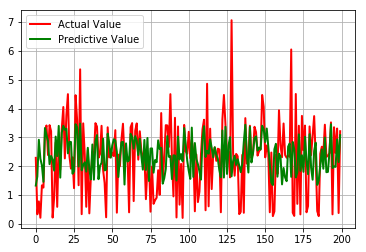

In [16]:
# 预测值和实际值进行画图对比
t = np.arange(len(X_test))
plt.figure(facecolor='W')#建立一个画布，facecolor代表背景色
plt.plot(t,Y_test,'r-',linewidth=2,label='Actual Value')
plt.plot(t,y_predict,'g-',linewidth=2,label='Predictive Value')
plt.legend(loc='upper left')# upper left , upper right , lower left , lower right
plt.grid(True)#画网格
plt.show()

In [17]:
# 功率和电流之间的关系
X=datas.iloc[:,2:4]
Y2=datas.iloc[:,5]

# 数据分割
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X,Y2,test_size=0.2,random_state=0)

# 数据标准化
scaler2=StandardScaler()
X2_train=scaler2.fit_transform(X2_train)# 训练并转换
X2_test=scaler2.transform(X2_test)#直接使用在模型构建数据上进行一个数据标准化操作

#模型训练
lr2=LinearRegression()
lr2.fit(X2_train,Y2_train)#训练模型


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#结果预测
Y2_predict=lr2.predict(X2_test)

In [20]:
# 模型评估
print("电流预测d的R^2：",lr2.score(X2_test,Y2_test))
print('电流参数：',lr2.coef_)

电流预测准确率： 0.9920420609708968
电流参数： [5.07744316 0.07191391]


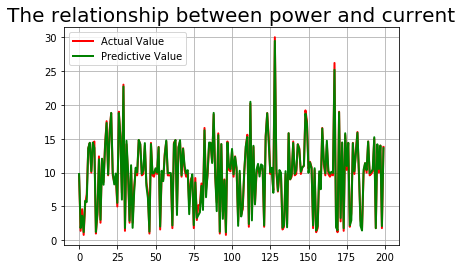

In [26]:
# 绘制图标
# 电流关系
t=np.arange(len(X2_test))
plt.figure(facecolor='w')
plt.plot(t,Y2_test,'r-',linewidth=2,label='Actual Value')
plt.plot(t,Y2_predict,'g-',linewidth=2,label='Predictive Value')
plt.legend(loc='upper left')
plt.title(u'The relationship between power and current',fontsize=20)#线性回归预测功率与电流之间的关系
plt.grid(b=True)
plt.show()